In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Filtro Gaussiano

In [36]:
def gaussian_filter_2d(filter_size):
    sigma = filter_size/6.
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

Filtragem mediana

In [ ]:
# import cv2
import numpy as np 
  
  
img_noisy1 = plt.imread('imagens/022.png', 0) 
m, n = img_noisy1.shape 
   
img_new1 = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
plt.imshow(img_new1, 'gray')

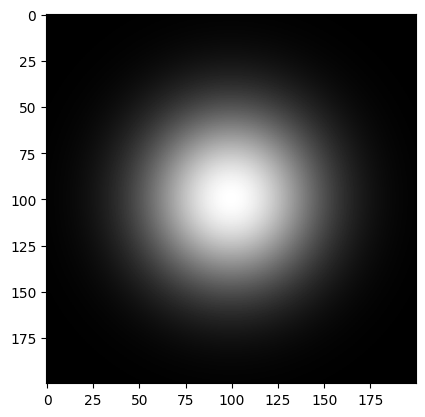

In [38]:
w = gaussian_filter_2d(200)
plt.imshow(w, 'gray')

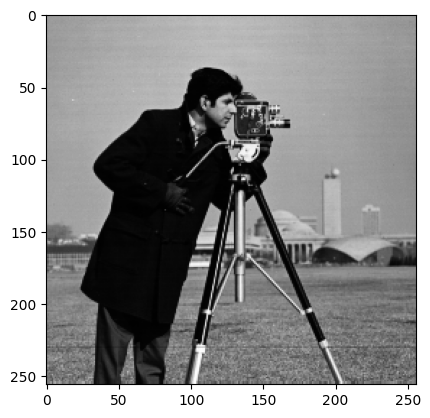

In [39]:
img = plt.imread('imagens/cameraman.tiff')
plt.imshow(img, 'gray')

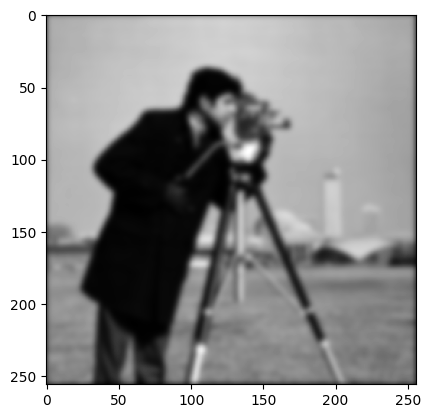

In [40]:
# Filtragem utilizando uma função do scipy
import scipy.signal
w = gaussian_filter_2d(13)
img_filtered_scipy = scipy.signal.convolve(img, w, mode='same')
plt.imshow(img_filtered_scipy, 'gray')

# Filtro Mediana

# Filtro Média Geométrica

In [ ]:
def mediaGeo(img):
    resol = 0
    numLin, numCol = img.shape

    

    return resol

print("")